In [2]:
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df1 = pd.read_csv('English_Abstractive.csv')

from sklearn.model_selection import train_test_split

# Separating features and labels
x = df1.iloc[:, :-1].values  # Feature vectors
y = df1['Judgement Status'].values  # Labels

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training the classifier
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Testing the classifier
accuracy = knn.score(x_test, y_test)
print(f"Accuracy of kNN (k=3): {accuracy * 100:.2f}%")

# Predicting the class labels for the test set
y_pred = knn.predict(x_test)

# Displaying the first 10 predictions alongside actual labels
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

Accuracy of kNN (k=3): 22.22%
Predicted: 0, Actual: 1
Predicted: 3, Actual: 3
Predicted: 3, Actual: 2
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 3, Actual: 0
Predicted: 3, Actual: 1
Predicted: 0, Actual: 2


In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model_performance(y_true, y_pred, dataset_type='Test'):
    """
    Evaluates the performance of the kNN model.
    
    Parameters:
    - y_true: Actual labels
    - y_pred: Predicted labels
    - dataset_type: Type of dataset ('Test' or 'Train')
    
    Returns:
    - None
    """
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"{dataset_type} Confusion Matrix:\n{conf_matrix}")

    # Precision, Recall, and F1-Score for multiclass classification
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"{dataset_type} Precision: {precision:.2f}")
    print(f"{dataset_type} Recall: {recall:.2f}")
    print(f"{dataset_type} F1-Score: {f1:.2f}")

    return f1  # Return F1 score for comparison

def compare_model_fit(f1_train, f1_test):
    """
    Compares training and testing F1 scores to determine model fit.
    
    Parameters:
    - f1_train: F1 score for training data
    - f1_test: F1 score for testing data
    
    Returns:
    - None
    """
    if f1_train > f1_test:
        print("The model may be overfitting.")
    elif f1_train < f1_test:
        print("The model may be underfitting.")
    else:
        print("The model seems to be well-fit.")


# Evaluate performance on test data
f1_test = evaluate_model_performance(y_test, y_pred, dataset_type='Test')

# Predicting on training data
y_train_pred = knn.predict(x_train)

# Evaluate performance on training data
f1_train = evaluate_model_performance(y_train, y_train_pred, dataset_type='Training')

# Compare F1 scores to identify overfitting or underfitting
compare_model_fit(f1_train, f1_test)

Test Confusion Matrix:
[[14 24  2 12]
 [22 18  4 11]
 [10 15  2  8]
 [12 16  4  6]]
Test Precision: 0.20
Test Recall: 0.20
Test F1-Score: 0.20
Training Confusion Matrix:
[[46 27  6 12]
 [33 73  2 13]
 [37 33 27 13]
 [19 45  5 29]]
Training Precision: 0.46
Training Recall: 0.41
Training F1-Score: 0.40
The model may be overfitting.


In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Assuming y_test and y_pred are true and predicted values for regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

MSE: 2.4944444444444445
RMSE: 1.5793810320642845
MAPE: 1601279867509509.8
R2 Score: -1.044057765750272


In [14]:
import matplotlib.pyplot as plt
import numpy as np

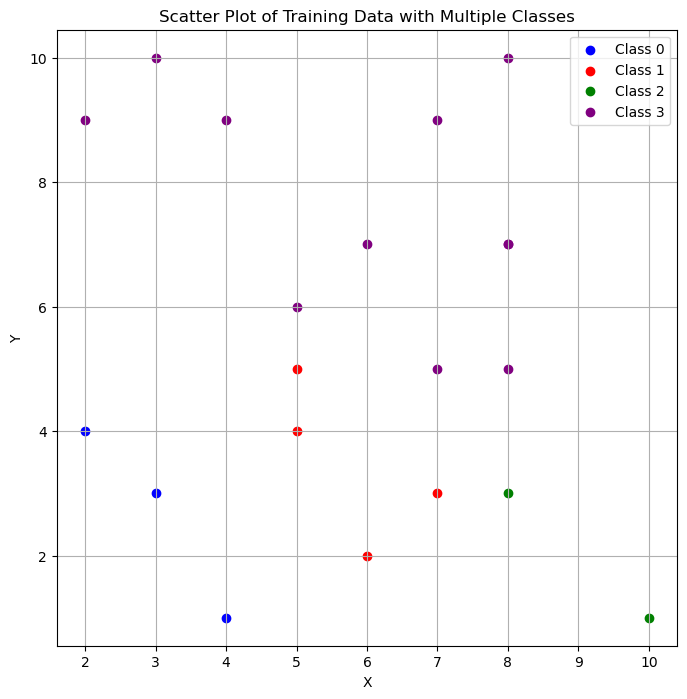

In [16]:
# Generate 20 random data points for X and Y
np.random.seed(42)
X = np.random.randint(1, 11, 20)
Y = np.random.randint(1, 11, 20)

# Assign classes based on the value of X and Y
# Here we create 4 classes based on different conditions
classes = np.zeros(20, dtype=int)  # Initialize an array for classes

# Class assignment based on conditions
classes[(X + Y <= 10) & (X < 5)] = 0  # Class 0
classes[(X + Y <= 10) & (X >= 5)] = 1  # Class 1
classes[(X + Y > 10) & (Y < 5)] = 2    # Class 2
classes[(X + Y > 10) & (Y >= 5)] = 3   # Class 3

# Plotting the scatter plot
plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green', 'purple']
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

for class_label in range(4):
    plt.scatter(X[classes == class_label], Y[classes == class_label], 
                color=colors[class_label], label=labels[class_label])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data with Multiple Classes')
plt.legend()
plt.grid()
plt.show()

In [18]:
def generate_test_data():
    # Generate test data points
    test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    return test_X, test_Y, np.c_[test_X.ravel(), test_Y.ravel()]

def train_knn(X, Y, classes, k):
    # Train a kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.c_[X, Y], classes)
    return knn

def plot_decision_boundary(knn, test_data, test_X, test_Y, X, Y, classes, k):
    # Predict the class for each test data point
    test_pred = knn.predict(test_data)
    test_pred = test_pred.reshape(test_X.shape)

    # Plot the decision boundary and the training points
    plt.figure(figsize=(8, 8))
    plt.contourf(test_X, test_Y, test_pred, alpha=0.3, cmap='coolwarm')
    
    # Plot each class with a different color
    colors = ['blue', 'red', 'green', 'purple']
    labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
    
    for class_label in range(4):
        plt.scatter(X[classes == class_label], Y[classes == class_label], 
                    color=colors[class_label], label=labels[class_label])

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'kNN Classifier (k={k}) on Test Data')
    plt.legend()
    plt.grid()
    plt.show()

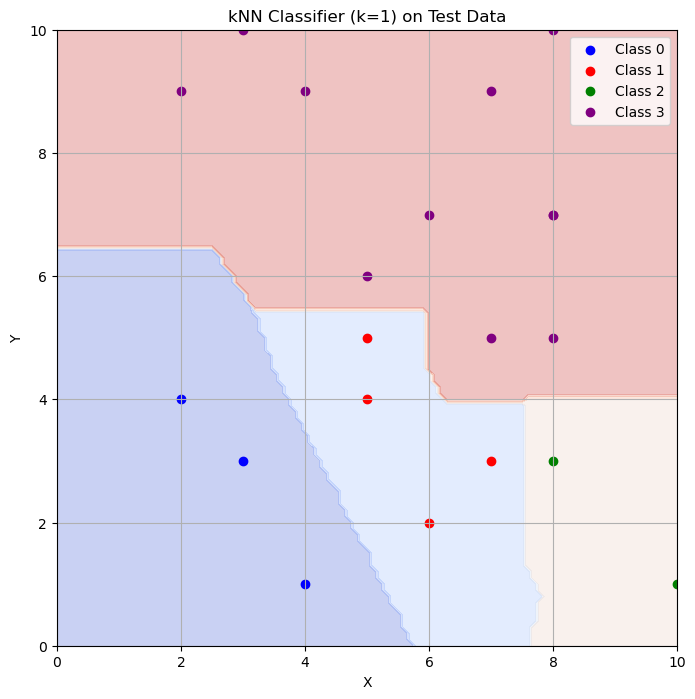

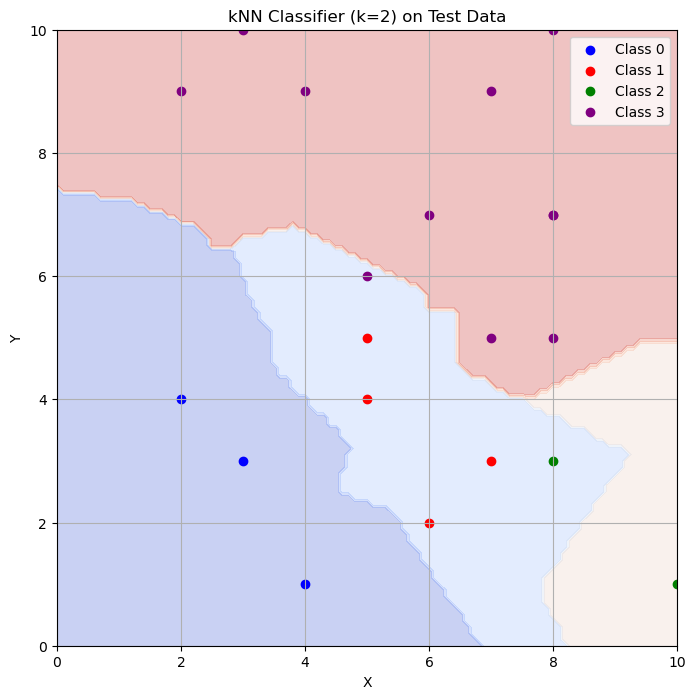

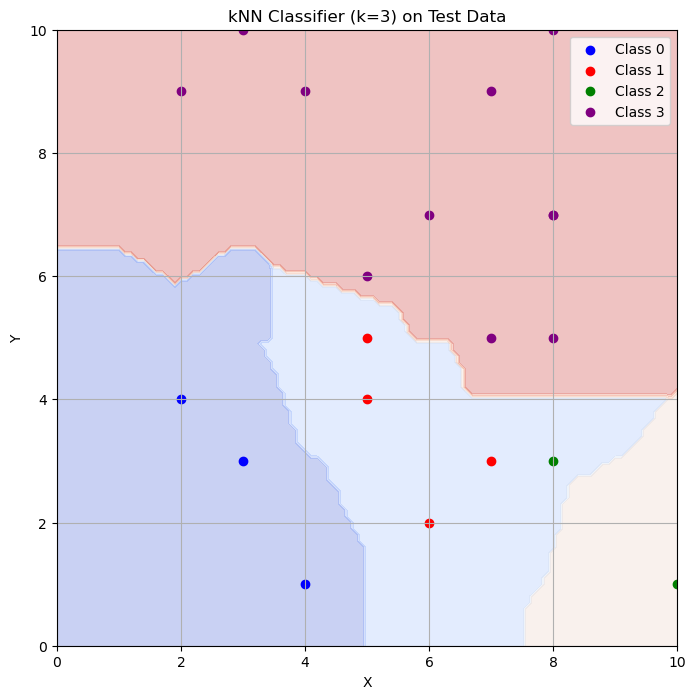

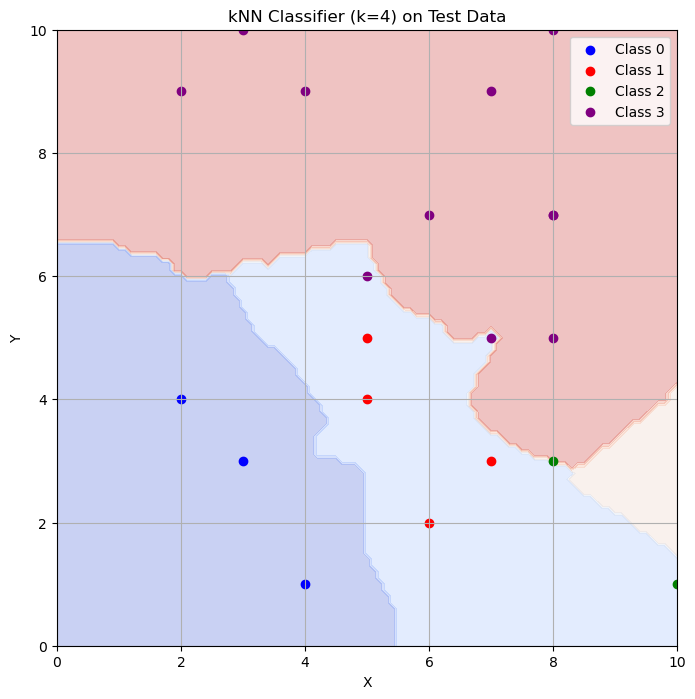

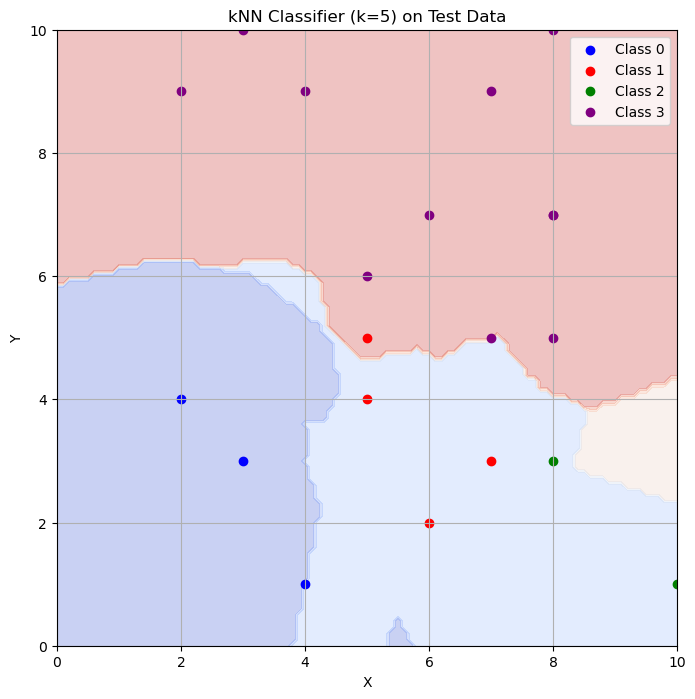

In [20]:
# Generate random training data
np.random.seed(42)
X = np.random.randint(1, 11, 20)
Y = np.random.randint(1, 11, 20)

# Assign classes based on conditions
classes = np.zeros(20, dtype=int)
classes[(X + Y <= 10) & (X < 5)] = 0
classes[(X + Y <= 10) & (X >= 5)] = 1
classes[(X + Y > 10) & (Y < 5)] = 2
classes[(X + Y > 10) & (Y >= 5)] = 3

# Generate test data
test_X, test_Y, test_data = generate_test_data()

# Repeat the classification and plotting for k=1 to 5
for k in range(1, 6):
    knn = train_knn(X, Y, classes, k)
    plot_decision_boundary(knn, test_data, test_X, test_Y, X, Y, classes, k)

In [22]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(x_train, y_train):
    # Define the parameter grid for 'k'
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Initialize the GridSearchCV
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

    # Fit the model
    grid_search.fit(x_train, y_train)

    # Get the best parameter 'k'
    best_k = grid_search.best_params_['n_neighbors']
    return best_k

In [28]:
# Assuming x_train and y_train are defined for grid search
x_train = np.c_[X, Y]
y_train = classes

# Perform grid search to find the best k
best_k = perform_grid_search(x_train, y_train)
print(f"Best k value found: {best_k}")

C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best k value found: 1


C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_in